<a href="https://colab.research.google.com/github/amitucw/BREASTCANCER/blob/main/TREE_DIAGRAMbreast_cancer_AK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/DECISION TREE/BREAST CANCER DATA.xlsx')

In [ ]:
df.shape

(569, 32)

In [ ]:
#print(df)

In [ ]:
df.drop('id',inplace=True,axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.tail()#Malignant (M): cancer, Benign (B): no cancer


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Axes: >

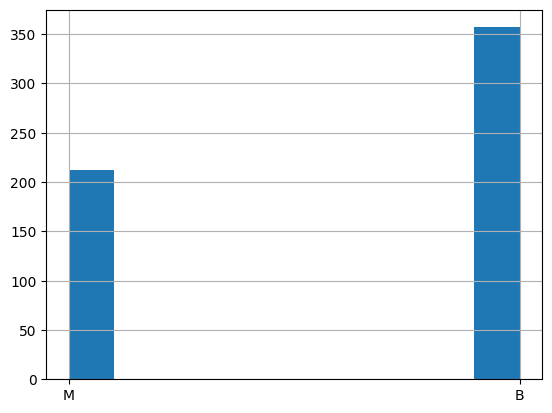

In [ ]:
df['diagnosis'].hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [ ]:
df.describe()#50% of the data is less than 13.37, it is percentile ..50%

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
x=df.drop(columns=['diagnosis'],axis=1)
y=df['diagnosis']

In [ ]:
print(x)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [ ]:
print(y)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)#split the data into training and testing

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(569, 30) (398, 30) (171, 30)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf= DecisionTreeClassifier() #you can take any parameter such as clf= DecidionTreeClassifier(criterion='gini');note I have created an object i.e clf
clf.fit(x_train,y_train) #train the decision tree algorithm on the dataset x_train and y_train

DecisionTreeClassifier()

In [ ]:
x_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
205,15.12,16.68,98.78,716.6,0.08876,0.09588,0.075500,0.040790,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.1491,0.33310,0.332700,0.12520,0.3415,0.09740
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.027880,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.1428,0.25100,0.212300,0.09861,0.2289,0.08278
69,12.78,16.49,81.37,502.5,0.09831,0.05234,0.036530,0.028640,0.1590,0.05653,...,13.46,19.76,85.67,554.9,0.1296,0.07061,0.103900,0.05882,0.2383,0.06410
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.025550,0.021790,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.1426,0.21870,0.116400,0.08263,0.3075,0.07351
317,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.113000,0.079500,0.1807,0.05664,...,21.84,25.00,140.90,1485.0,0.1434,0.27630,0.385300,0.17760,0.2812,0.08198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,11.45,20.97,73.81,401.5,0.11020,0.09362,0.045910,0.022330,0.1842,0.07005,...,13.11,32.16,84.53,525.1,0.1557,0.16760,0.175500,0.06127,0.2762,0.08851
327,12.03,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,0.06070,...,13.07,22.25,82.74,523.4,0.1013,0.07390,0.007732,0.02796,0.2171,0.07037
138,14.95,17.57,96.85,678.1,0.11670,0.13050,0.153900,0.086240,0.1957,0.06216,...,18.55,21.43,121.40,971.4,0.1411,0.21640,0.335500,0.16670,0.3414,0.07147
17,16.13,20.68,108.10,798.8,0.11700,0.20220,0.172200,0.102800,0.2164,0.07356,...,20.96,31.48,136.80,1315.0,0.1789,0.42330,0.478400,0.20730,0.3706,0.11420


In [ ]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
y_pred=clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("accuracy is ", accuracy_score(y_test, y_pred))

accuracy is  0.9239766081871345


In [ ]:
clf.score(x_test,y_test)

0.9239766081871345

In [ ]:
input_data=()

In [ ]:
patient1= [17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601]

In [ ]:
type(patient1)

list

In [ ]:
patient1=np.array([patient1])#we need to convert into two dimensional array
patient1

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        1.587e-02, 3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02,
        2.019e+03, 1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01]])

In [ ]:
clf.predict(patient1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['M'], dtype=object)

In [ ]:
#df.drop("id",axis=1,inplace=True)#NOT SAVED ANYWHERE SUCH AS X
features_name=df.columns.tolist()

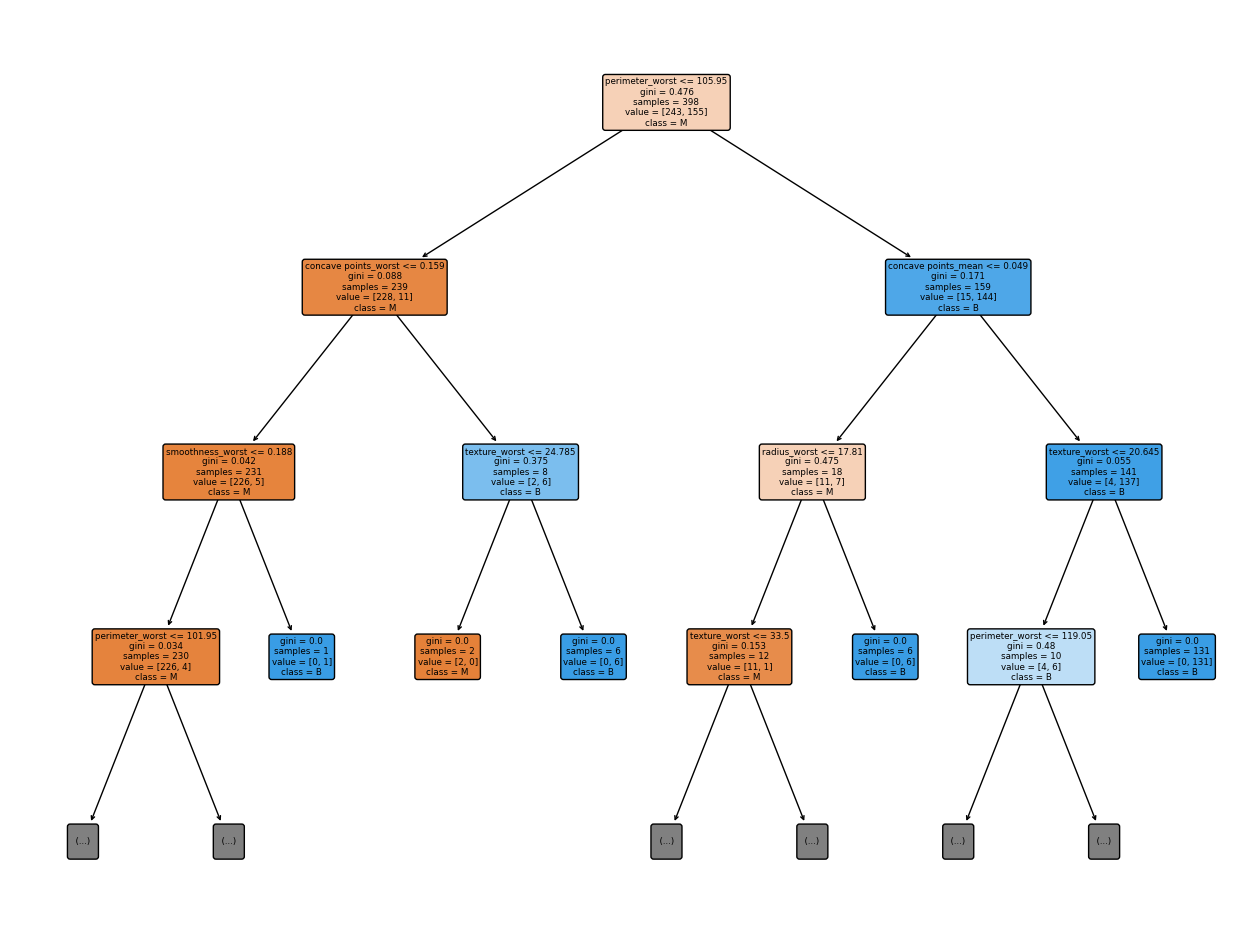

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
# Plot the Decision Tree
plt.figure(figsize=(16, 12))#12 cm length, 10 cm width
tree.plot_tree(clf,
               feature_names=x.columns,
               class_names=["M", "B"],
               max_depth=3,
               filled=True,
               rounded=True)
plt.show()#left(less than), right (more than) #IF PERIMETER_WORST<=105.95, THE PATIENT IS HAVING M (CANCER), BUT IF IT IS MORE THEN B (NO CANCER. NOW LET US CONSIDER SECOND PARAMETER)
